# [StyleGAN2-ADA](https://github.com/NVlabs/stylegan2-ada-pytorch)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.set_option("display.max_colwidth", 75)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (20,5)
#plt.style.use('fivethirtyeight')
import matplotlib.image as mpimg

import seaborn as sns
sns.set(font_scale=1.5)

import sklearn
sklearn.set_config(transform_output="pandas")

import os
import glob

In [2]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128 (from 1)
Receiving objects: 100% (131/131), 1.13 MiB | 24.63 MiB/s, done.
Resolving deltas: 100% (57/57), done.


rm: cannot remove 'out/*': No such file or directory
Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/afhqcat.pkl"...
/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded

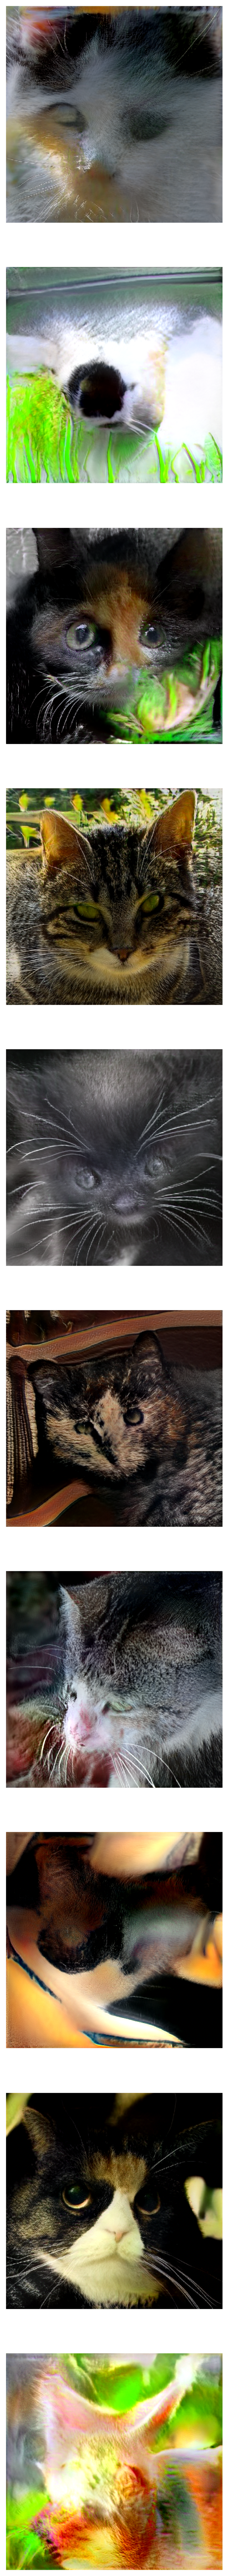

In [3]:
# choose a pre-trained model

#pickle = "metfaces.pkl" # Metropolitan Museum of Art Collection
pickle = "afhqcat.pkl" # Cats
#pickle = "afhqdog.pkl" # Dogs
#pickle = "afhqwild.pkl" # Wild animals
#pickle = "ffhq.pkl" # Human faces

# clean the output directory
!rm out/*

!python stylegan2-ada-pytorch/generate.py --outdir=out --trunc=2.0 --seeds=32-41 \
--network="https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/{pickle}"

images = []
for img_path in glob.glob('./out/seed*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(50,60))
columns = 1
for i, image in enumerate(images):
    plt.subplot(len(images), columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

# Related reading
* [StyleGAN2-ADA — Official PyTorch implementation](https://github.com/NVlabs/stylegan2-ada-pytorch) - GitHub repo
* ["Training Generative Adversarial Networks with Limited Data"](https://arxiv.org/pdf/2006.06676) - arXiv paper (pdf)
* [MetFaces Dataset](https://github.com/NVlabs/metfaces-dataset)